In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load the dataset
# Assuming dataset has been cleaned and preprocessed
data = pd.read_csv('dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['target'])  # Drop target column 'stroke'
y = data['target']  # Target variable

In [54]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Standardize the features (SVM performs better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
# Convert scaled data back into a DataFrame for easier feature selection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [57]:
# Initialize SVM model with a linear kernel (you can use 'rbf' for non-linear data)
model = SVC(kernel='linear', random_state=42)


In [58]:
# Initialize empty lists for selected features and remaining features
selected_features = []
remaining_features = list(X_train_scaled.columns)

In [59]:
# Initialize empty lists for selected features and remaining features
selected_features = []
remaining_features = list(X_train_scaled.columns)

In [60]:
# Best score tracker
best_score = 0

# Forward feature selection loop
while remaining_features:
    best_feature = None
    for feature in remaining_features:
        # Create temporary list of selected features + current feature
        temp_features = selected_features + [feature]
        
        # Train SVM with the selected features
        X_train_temp = X_train_scaled[temp_features]
        X_test_temp = X_test_scaled[temp_features]
        
        model.fit(X_train_temp, y_train)
        y_pred = model.predict(X_test_temp)
        
        # Calculate accuracy score
        score = accuracy_score(y_test, y_pred)
        
        # If this feature improves the score, update best_feature and best_score
        if score > best_score:
            best_score = score
            best_feature = feature
    
    # If a feature improved the score, add it to selected features and remove from remaining features
    if best_feature:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f'ADDED FEATURE: {best_feature}, SCORE: {best_score:.4f}')
    else:
        # Stop if no feature improves the score
        break

ADDED FEATURE: cp, SCORE: 0.8033
ADDED FEATURE: thalach, SCORE: 0.8361
ADDED FEATURE: thal, SCORE: 0.8689
ADDED FEATURE: chol, SCORE: 0.8852


In [67]:
# Final model with selected features
print(f"\nSelected Features: {selected_features}")
print(f"Actual Number of Features: {data.shape[1]} \n After Reduction : {len(selected_features)}")
print(f"Final Accuracy: {best_score:.4f}")


Selected Features: ['cp', 'thalach', 'thal', 'chol']
Actual Number of Features: 14 
 After Reduction : 4
Final Accuracy: 0.8852


In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.25%


In [62]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[24  5]
 [ 4 28]]


In [63]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



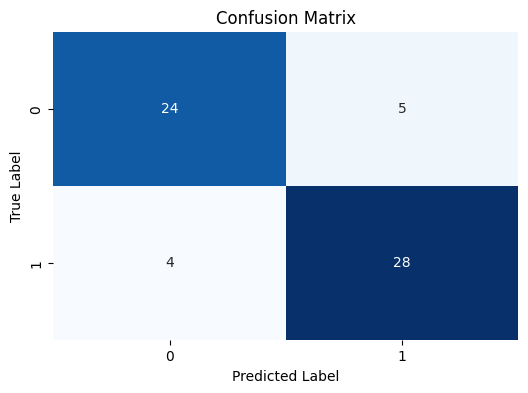

In [64]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()